In [19]:
%matplotlib inline

from datetime import datetime
from imp import reload

import attr
import gym
from matplotlib import pyplot as plt
import numpy as np
from numpy.random import seed as rng_seed
from smooth import smooth

ENV_NAME = 'CartPole-v1'
env = gym.make(ENV_NAME)
STATE_SIZE = env.observation_space.shape
ACTION_SIZE = env.action_space.n
ACTOR_STEP_SIZE = .01
CRITIC_STEP_SIZE = .01
DISCOUNT_RATE = 0.99


# https://machinelearningmastery.com/reproducible-results-neural-networks-keras/#comment-414394
rng_seed(0)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


# REINFORCE w Baseline (episodic)
### From Sutton/Barto Reinforcement Learning 2nd ed, p. 332

Network:
- input: state-size input
- hidden: 64 units, ReLU
- output: action-size, prob of each action


In [ ]:
s0, a0, r1, s1, a1, r2

pred_val1
tru_val1

In [22]:
def reinforce(env, policy, value_func, policy_stepsize=2e-9, value_stepsize=2e-6):
    pass


@attr.s
class Policy:
    input_size = attr.ib()
    output_size = attr.ib()
    hidden_size = attr.ib(default=64)
    
    def __attrs_post_init__(self):         
        scale_factor1 = 1 / np.sqrt(input_size+1)
        self.W1 = np.random.normal(scale=scale_factor1, size=(1, hidden_size+1))
        self.W1[0][-1] = np.random.normal()  # bias weight
        scale_factor2 = 1/np.sqrt(W1.shape[1])
        self.W2 = np.random.normal(scale=scale_factor2, size=(W1.shape[1], output_size))
        self.W2[-1] = np.random.normal(size=(1, output_size))  # bias weights
    
    def forward(self, data):
        bias = np.ones((data.shape[0], 1))
        data = np.hstack(data, bias)
        
        

@attr.s
class ValueFunc(Policy):
    policy = attr.ib()
    env = attr.ib()
    step_size = attr.ib()
    discount_rate = attr.ib()
    hidden_size = attr.ib(default=64)
    
    def __attrs_post_init__(self):         
        scale_factor1 = 1 / np.sqrt(input_size+1)
        self.W1 = np.random.normal(scale=scale_factor1, size=(1, hidden_size+1))
        self.W1[0][-1] = np.random.normal()  # bias weight
        scale_factor2 = 1/np.sqrt(W1.shape[1])
        self.W2 = np.random.normal(scale=scale_factor2, size=(W1.shape[1], output_size))
        self.W2[-1] = np.random.normal(size=(1, output_size))  # bias weights
    
    def train(self, num_episodes=100):
        start_values = []
        for _ in range(num_episodes):
            state = self.env.reset()
            is_done = False
            start_values.append(self.predict_value(state))
            while not is_done:
                action = self.policy.sample_action(state)
                state_, true_current_reward, is_done, _ = self.env.step(action)
                predicted_current_reward, gradient = self.preduct_value(state)

                gradient_scale_factor = self.step_size * (reward + self.discount_rate * predicted_next_reward - predicted_current_reward)                
                W1_gradient, W2_gradient = gradient
                self.W1 += gradient_scale_factor * W1_gradient
                self.W2 += gradient_scale_factor * W2_gradient
                state = state_
        return start_values
    
    def predict_value(self, state, target)    
        bias = np.ones((data.shape[0], 1))
        state = np.hstack(state, bias)
        z1 = state.T.dot(self.W1)
        a1 = z1.copy()
        a1[a1 < 0] = 0
        z2 = a1.dot(self.W2)
        
        delta2 = 
        
        return value, (W1_gradient, W2_gradient) 



ValueError: No mandatory attributes allowed after an attribute with a default value or factory.  Attribute in question: Attribute(name='policy', default=NOTHING, validator=None, repr=True, cmp=True, hash=None, init=True, convert=None, metadata=mappingproxy({}), type=None)

In [ ]:
policy = make_policy(STATE_SIZE, ACTION_SIZE)
value_func = make_policy(STATE_SIZE, ACTION_SIZE)
reinforce(env, policy, value_func)


## One-step Actor-Critic (episodic).

```
Input: a differentiable policy parameterization π(a|s, θ)
Input: a differentiable state-value function parameterization vˆ(s,w) 
Parameters: step sizes α^θ > 0, α^w > 0
Initialize policy parameter θ ∈ Rd′ and state-value weights w ∈ Rd (e.g., to 0) 
While True:
    Initialize S (first state of episode)
    I←1
    Loop while S is not terminal (for each time step):
        A ∼ π(·|S, θ)
        Take action A, observe S′, R 
        δ ← R + γ vˆ(S′,w) − vˆ(S,w) 
        w ← w + α^w I δ ∇ vˆ ( S , w )
        θ ← θ + α^θ I δ ∇ ln π(A|S, θ) 
        I ← γI
        S ← S′
```
#### From Sutton/Barto, Reinforcement Learning 2nd ed, p. 334

In [17]:
import keras
import tensorflow as tf

In [14]:
def make_actor(state_size, action_size, hidden_size=32):
    network = keras.Sequential()
    network.add(keras.layers.Dense(hidden_size, activation='relu', input_shape=state_size))
    network.add(keras.layers.Dense(action_size, activation='softmax'))
    network.compile(optimizer=keras.optimizers.Adam(), loss='mse')
    return network

def make_critic(state_size, hidden_size=32):
    network = keras.Sequential()
    network.add(keras.layers.Dense(hidden_size, activation='relu', input_shape=state_size))
    network.add(keras.layers.Dense(1, activation='linear'))
    network.compile(optimizer=keras.optimizers.Adam(), loss='mse')
    return network
    

In [15]:
actor = make_actor(STATE_SIZE, ACTION_SIZE)
critic = make_critic(STATE_SIZE)

In [9]:
def go(actor, critic):
    

In [38]:
import attr
import gym
from matplotlib import pyplot as plt
import numpy as np

env_name = 'CartPole-v1'
env = gym.make(env_name)


def cartpole_state_func(state):
    # for cartpole: pos, vel, ang, ang vel
    pos, vel, ang, ang_vel = state
    return np.array([1, pos, vel, ang, ang_vel, pos*vel, ang*ang_vel, pos*ang, pos*ang_vel, vel*ang, vel*ang_vel, pos*vel*ang*ang_vel])


@attr.s
class Policy:
    weights = attr.ib()
    state_func = attr.ib()

    def get_action(self, state):
        if np.random.random() < self.weights.dot(self.state_func(state)):
            return 1
        return 0


def run_episode(policy, env, render=False):
    state = env.reset()
    is_done = False
    states, actions, rewards = [], [], []
    for _ in range(200):                
        if render:
            env.render()        
        action = policy.get_action(state)
        state_, reward, is_done, _ = env.step(action)
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = state_
        if is_done:
            break
    return states, actions, rewards


def discounted_return(rewards, discount=0.95):
    total = 0
    for idx, score in enumerate(rewards):
        total += (discount ** idx) * score
    return total


# EPSILON = self.epsilon_min + (self.epsilon_max - self.epsilon_min) * math.exp(-self.annealing_const * self.steps)

# def reinforce(policy, env, step_size=1e-7, discount=0.9, num_episodes=1000, render_every=10):
def reinforce(policy, env, step_size_start=5e-6, step_size_end=1e-7, discount=0.9, num_episodes=2000, render_every=50):
    training_rewards = []
    step_sizes = []
    best_return = float('-inf')
    best_weights = None
    # policy_weight_diffs = []
    # old_weight = new_weight = None
    # import pdb; pdb.set_trace()
    step_size = step_size_start
    step_size_change = (step_size_start - step_size_end) / num_episodes
    for episode in range(num_episodes):
        
        states, actions, rewards = run_episode(policy, env, render=episode % render_every == 0)
        episode_return = sum(rewards)        
        if episode_return > best_return:
            best_return = episode_return
            best_weights = policy.weights
        training_rewards.append(episode_return)  
        #     data.append(end + start * .995 ** idx)
        step_size = step_size_end + step_size_start * .995 ** episode
        step_sizes.append(step_size)
        for idx, action in enumerate(actions):
            state = states[idx]
            G = discounted_return(rewards[idx:])            
            if episode % render_every == 0:
                print(f'{episode}: {episode_return}, step-size: {step_size:.2}', end='\r', flush=True)
            policy.weights += step_size * G * policy.state_func(state)/policy.weights.dot(policy.state_func(state))
    return training_rewards, best_return, best_weights, step_sizes



policy = Policy(weights=np.random.random(12), state_func=cartpole_state_func)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


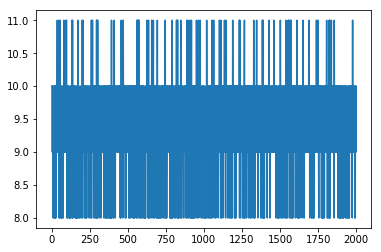

In [47]:
step_size_start = 5e-8
step_size_end = 1e-14
num_episodes = 2000
training_rewards, best_return, best_weights, step_sizes = reinforce(policy, env, render_every=50, num_episodes=num_episodes, step_size_start=step_size_start, step_size_end=step_size_end)
plt.plot(training_rewards)
plt.show()
env.close()


In [4]:

best_return, best_weights

(189.0, array([-0.95455163,  0.13930325, -6.69851751,  0.61900001, 10.44033207,
         0.42629127,  0.1821342 ,  0.10251606,  0.38757577,  0.17812744,
        -0.23087766,  0.67571064]))

In [7]:
policy.weights = np.array([-0.95455163,  0.13930325, -6.69851751,  0.61900001, 10.44033207,
         0.42629127,  0.1821342 ,  0.10251606,  0.38757577,  0.17812744,
        -0.23087766,  0.67571064])
env.reset()
for idx in range(10):
    run_episode(policy, env, render=True)
# env.close()    